# Module 3 Honors Quiz

## Q1

Identify which of the following conditions (possibly more than one) must be true for the sum of $n$ Bernoulli random variables (with success probability pp) to follow a binomial distribution.

1. each Bernoulli random variable is independent of all others
2. the sum must be greater than zero
3. $p$ must be less than .5
4. $p$ must be the same for each of the Bernoulli random variables
5. the sum must exceed $n$

### Answer
1 and 4 are true

For Questions 2-4, consider the following:

In Lesson 6.3 we found the prior predictive distribution for a Bernoulli trial under a uniform prior on the success probability $\theta$. We now derive the prior predictive distribution when the prior is any conjugate beta distribution.

There are two straightforward ways to do this. The first approach is the same as in the lesson. The marginal distribution of $y$ is $f(y) = \int_0^1 f(y|\theta) f(\theta) d\theta$. 

Now $f(\theta)$ is a beta PDF, but the same principles apply: we can move constants out of the integral and find a new normalizing constant to make the integral evaluate to 1.

Another approach is to notice that we can write Bayes' theorem as $f(\theta | y) = \frac{f(y|\theta)f(\theta)}{f(y)}$ . If we multiply both sides by $f(y)$ and divide both sides by $f(\theta | y)$, then we get $f(y) = \frac{f(y|\theta)f(\theta)}{f(\theta | y)}$ where $f(\theta)$ is the beta prior PDF and $f(\theta | y)$ is the updated beta posterior PDF.

## Q2
Both approaches yield the same answer. What is the prior predictive distribution $f(y)$ for this model when the prior for $\theta$ is $\text{Beta}(a,b)$?

### Answer

$$f(y) = \int_0^1 f(y \mid \theta) f(\theta) d\theta = \int_0^1 \theta^y (1-\theta)^{1-y} \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} \theta^{a-1} (1-\theta)^{b-1} d\theta = \int_0^1 \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} \theta^{a+y-1} (1-\theta)^{b-y} d\theta$$

Use $Z \mid \text{Beta}(a+y, b-y+1)$ which has

$$f(Z) = \frac{\Gamma(a+b+1)}{\Gamma(a+y)\Gamma(b-y+1)} \theta^{a+y-1} (1-\theta)^{b-y+1-1}$$

$$ \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} = \frac{\Gamma(a+b+1)}{\Gamma(a+y)\Gamma(b-y+1)} \cdot \frac{\Gamma(a+y)\Gamma(b-y+1)}{\Gamma(a+b+1)} \cdot \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}$$

Sub this back in to get

$$f(y) = \frac{\Gamma(a+y)\Gamma(b-y+1)}{\Gamma(a+b+1)} \cdot \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} \int_0^1 \frac{\Gamma(a+b+1)}{\Gamma(a+y)\Gamma(b-y+1)} \theta^{a+y-1} (1-\theta)^{b-y+1-1} d\theta$$

Last term integrates to 1 by definition so left with

$$f(y) = \frac{\Gamma(a+y)\Gamma(b-y+1)}{\Gamma(a+b+1)} \cdot \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} = \frac{\Gamma(a+b)}{\Gamma(a+b+1)} \cdot \frac{\Gamma(a+y)}{\Gamma(a)} \cdot \frac{\Gamma(b+1-y)}{\Gamma(b)}$$

## Q3
Beta-Bernoulli predictive distribution:

Now suppose the prior for $\theta$ is $\text{Beta}(2,2)$. What is the prior predictive probability that $y^*=1$? Round your answer to one decimal place.

Plugging this in to the above and recalling $\Gamma(n) = (n-1)!$ we get

$$f(y=1) = \frac{\Gamma(a+b)}{\Gamma(a+b+1)} \cdot \frac{\Gamma(a+y)}{\Gamma(a)} \cdot \frac{\Gamma(b+1-y)}{\Gamma(b)} = \frac{\Gamma(4)}{\Gamma(5)} \cdot \frac{\Gamma(3)}{\Gamma(2)} \cdot \frac{\Gamma(2)}{\Gamma(2)}  = \frac{\Gamma(4)}{\Gamma(5)} \cdot \frac{\Gamma(3)}{\Gamma(2)} = \frac{3!}{4!} \cdot \frac{2!}{1!} = \frac{2}{4} = 0.5$$

## Q4
After specifying our $\text{Beta}(2,2)$ prior for $\theta$, we observe 10 Bernoulli trials, 3 of which are successes.

What is the posterior predictive probability that $y^*=1$ for the next (11th) observation $y^*$? Round your answer to two decimal places.

The posterior $\theta$ is 

$$\theta \mid \tilde{y} \sim \text{Beta}(2+3,2+10-3) = \text{Beta}(5,9)$$

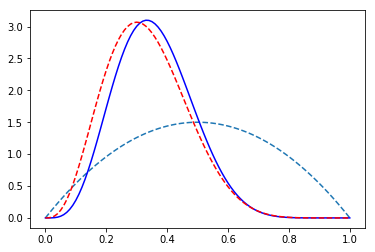

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.stats import binom

theta = np.linspace(0,1,101)

ftheta0 = beta.pdf(theta, 2, 2)
ftheta1 = beta.pdf(theta, 5, 9)
results = binom.pmf(3,10,theta)*11.5

plt.plot(theta, ftheta0, linestyle='dashed')
plt.plot(theta, ftheta1, color='blue')
plt.plot(theta, results,linestyle='dashed',color='red')
plt.show()

Didn't actually need to bother with all that, the probability of a success is determined by the Beta(5,9) functions, which can be thought of as having observed 5 sucesses and 9 failures. P(y*=1|y~) is therefore 5/(5+9)

In [11]:
5/14

0.35714285714285715